
# **Floresta Aleatória (Random Forest) - Regressão**

Random Forest ou Floresta Aleatória é uma técnica de *ensemble* capaz de realizar tanto tarefas de regressão quanto de classificação com o uso de **múltiplas árvores de decisão**. A ideia básica por trás disso é combinar várias árvores de decisão para determinar o resultado final, em vez de depender de árvores de decisão individuais.

Random Forest tem múltiplas árvores de decisão como modelos de aprendizagem de base. Realizamos aleatoriamente amostragem de linhas e amostragem de recursos do conjunto de dados formando conjuntos de dados de amostra para cada modelo. Esta parte é chamada de **Bootstrap**.


Toda árvore de decisão tem alta variância, mas quando combinamos todas elas em paralelo, a variância resultante é baixa, pois cada árvore de decisão é perfeitamente treinada nesses dados de amostra específicos e, portanto, a saída não depende de uma árvore de decisão, mas de múltiplas árvores de decisão. No caso de um problema de regressão, a saída final é a média de todas as saídas. Esta parte é chamada de **Agregação**.



# Exemplo


#### 1. Importando as bibliotecas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 2. Importando os dados

In [82]:
# Carregar o dataset
ds = pd.read_csv("AirQualityUCI.csv", sep=";", header=0)

# Selecionar a coluna 3 para X e a coluna 2 para y (adaptar conforme necessário)
X = ds.iloc[1:, 6].values  # Coluna 3
y = ds.iloc[1:, 11].values  # Coluna 2

# Converter X e y para pandas Series para aplicar métodos como replace() e dropna()
X = pd.Series(X).apply(lambda x: str(x).replace(',', '.')).astype(float)
y = pd.Series(y).apply(lambda x: str(x).replace(',', '.')).astype(float)  # Certificar que y também esteja no formato numérico

# Transformar valores infinitos em NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remover valores NaN
X.dropna(inplace=True)
y.dropna(inplace=True)

# Converter X de volta para um array numpy com uma coluna
X = np.array(X).reshape(-1, 1)

# Verifique se o formato está correto
print(X[:5])
print(y[:5])


[[955.]
 [939.]
 [948.]
 [836.]
 [750.]]
0     972.0
1    1074.0
2    1203.0
3    1110.0
4     949.0
dtype: float64


#### 3. Treinamento

In [84]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 50, random_state = 0)
modelo.fit(X, y)

RandomForestRegressor(n_estimators=50, random_state=0)

#### 4. Prevendo o resultado

In [61]:
y_pred = modelo.predict([[3755]])
print(y_pred)

[596.5]


#### 5. Visualizando os resultados

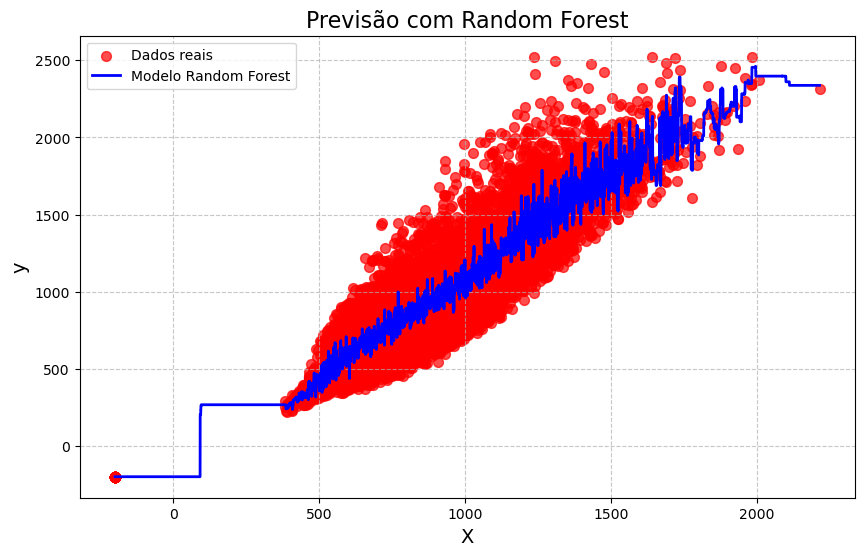

In [91]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Criar o gráfico
plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura
plt.scatter(X, y, color='red', label='Dados reais', s=50, alpha=0.7)  
plt.plot(X_grid, modelo.predict(X_grid), color='blue', linewidth=2, label='Modelo Random Forest')

plt.title('Previsão com Random Forest', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()

In [86]:
from sklearn.metrics import r2_score

y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

print(f'Coeficiente de Determinação (R²): {r2:.4f}')

Coeficiente de Determinação (R²): 0.8585
